In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../evaluation.csv")
df

,Unnamed: 0,player,mcts_simuls,mcts_rate,player_first,result_from_player,score_diff_from_player,moves
0,0,random,0,1.4,True,1,4,"[12, 13, 6, 0, 5, 11, 10, 9, 7, 4, 3, 15, 2, 1..."
1,1,random,0,1.4,False,-1,-4,"[4, 13, 1, 11, 6, 12, 15, 3, 8, 0, 14, 2, 9, 7..."
2,2,random,0,1.4,True,1,4,"[13, 5, 10, 12, 3, 11, 9, 14, 6, 0, 8, 1, 2, 1..."
3,3,random,0,1.4,False,1,2,"[15, 13, 14, 5, 3, 7, 1, 6, 8, 2, 4, 12, 11, 0..."
4,4,random,0,1.4,True,-1,-1,"[15, 1, 5, 10, 6, 2, 13, 9, 7, 14, 11, 12, 4, ..."
...,...,...,...,...,...,...,...,...
315,315,test,250,1.4,False,0,0,"[9, 5, 10, 6, 8, 13, 1, 11, 14, 4, 2, 7, 15, 3..."
316,316,test,250,1.4,True,1,3,"[9, 5, 10, 13, 6, 7, 4, 8, 14, 2, 11, 12, 0, 3..."
317,317,test,250,1.4,False,0,0,"[6, 9, 10, 5, 7, 13, 8, 1, 2, 14, 11, 4, 12, 3..."
318,318,test,250,1.4,True,1,4,"[9, 6, 10, 4, 5, 11, 14, 8, 1, 0, 3, 13, 7, 12..."


(-1.0, 1.0)

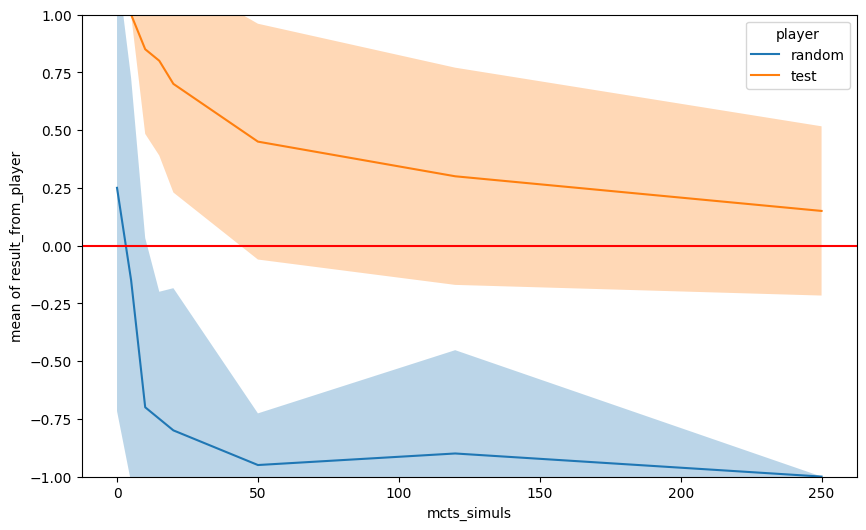

In [7]:
grouped = df.groupby(['player', 'mcts_simuls'])['result_from_player'].agg(['mean', 'std'])

pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
ax = pivoted.plot.line(figsize=(10, 6))

for player in pivoted.columns:
    y = pivoted[player]
    std = grouped.loc[player]["std"]
    ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

ax.set_xlabel('mcts_simuls')
ax.set_ylabel('mean of result_from_player')
plt.axhline(y=0, color='r', linestyle='-')
ax.set_ylim(-1, 1)

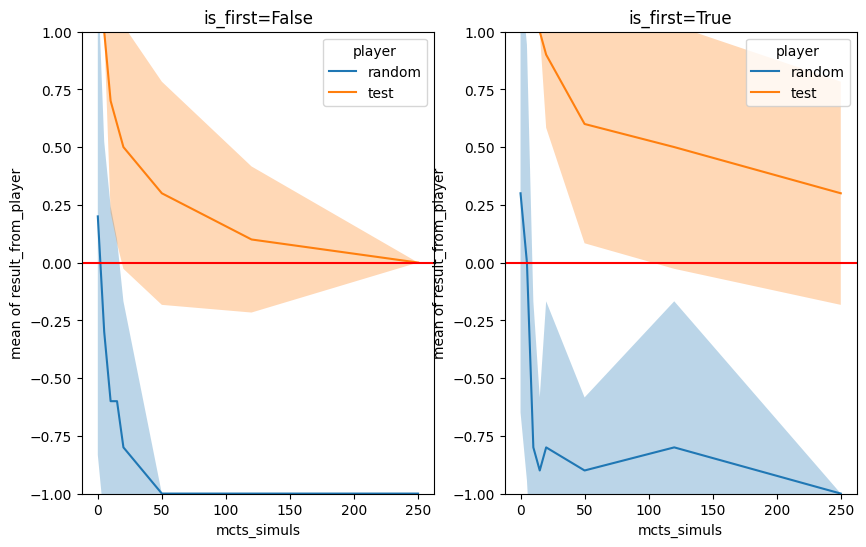

In [12]:
fig, axs = plt.subplots(1, 2)
for is_first in [False, True]:
    grouped = df[df["player_first"] == is_first].groupby(['player', 'mcts_simuls'])['result_from_player'].agg(['mean', 'std'])

    pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
    ax = pivoted.plot.line(figsize=(10, 6), ax=axs[int(is_first)])

    for player in pivoted.columns:
        y = pivoted[player]
        std = grouped.loc[player]["std"]
        ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

    ax.set_xlabel('mcts_simuls')
    ax.set_ylabel('mean of result_from_player')
    ax.axhline(y=0, color='r', linestyle='-')
    ax.set_ylim(-1, 1)
    ax.set_title(f"{is_first=}")

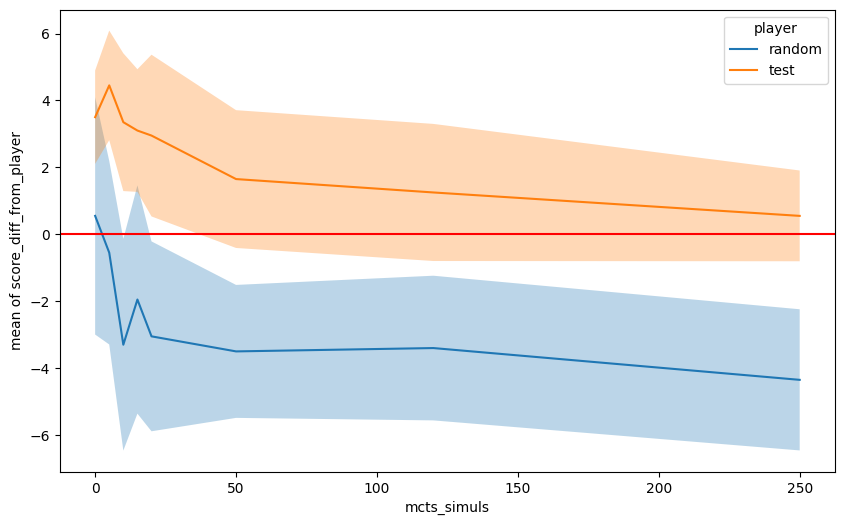

In [8]:
grouped = df.groupby(['player', 'mcts_simuls'])['score_diff_from_player'].agg(['mean', 'std'])

pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
ax = pivoted.plot.line(figsize=(10, 6))

for player in pivoted.columns:
    y = pivoted[player]
    std = grouped.loc[player]["std"]
    ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

ax.set_xlabel('mcts_simuls')
ax.set_ylabel('mean of score_diff_from_player')
plt.axhline(y=0, color='r', linestyle='-')
# ax.set_ylim(-1, 1)